<pre>
1. Download the data from <a href='https://drive.google.com/file/d/15dCNcmKskcFVjs7R0ElQkR61Ex53uJpM/view?usp=sharing'>here</a>

2. Code the model to classify data like below image

<img src='https://i.imgur.com/33ptOFy.png'>

3. Write your own callback function, that has to print the micro F1 score and AUC score after each epoch.

4. Save your model at every epoch if your validation accuracy is improved from previous epoch. 

5. you have to decay learning based on below conditions 
        Cond1. If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the
               learning rate by 10%. 
        Cond2. For every 3rd epoch, decay your learning rate by 5%.
        
6. If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training. 

7. You have to stop the training if your validation accuracy is not increased in last 2 epochs.

8. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

9. use cross entropy as loss function

10. Try the architecture params as given below. 
</pre>

<pre>
<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-4</b>
<pre>
1. Try with any values to get better accuracy/f1 score.  
</pre>
</pre>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 23 12:22:34 2020

@author: User
"""


from tensorflow.keras.layers import Dense,Input,Activation,Dropout,BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
from sklearn import metrics
#from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
import datetime
# Clear any logs from previous runs
import shutil


os.chdir(r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks")

# Read a Csv file Input file

df = pd.read_csv('data.csv')

# Set Input and Target
X = df.drop('label',axis=1)
y = df['label']

# Split train and test dataset

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size =0.3,random_state=123)

#Normalizse - Better learning for model
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

y_train = tf.keras.utils.to_categorical(y_train, 2) 
y_test = tf.keras.utils.to_categorical(y_test, 2)

# Input - model inputs either a single array or a list of arrays

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Remove the Directory of logs 


    

(14000, 2)
(6000, 2)
(14000, 2)
(6000, 2)


In [19]:
def removing_logs():
    try:
        shutil.rmtree(r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs")
    except:

        pass

In [2]:
class Callback(object):
    
    """Abstract base class used to build new callbacks.
      Attributes:
          params: dict. Training parameters
              (eg. verbosity, batch size, number of epochs...).
          model: instance of `keras.models.Model`.
              Reference of the model being trained.
          validation_data: Deprecated. Do not use.
      The `logs` dictionary that callback methods
      take as argument will contain keys for quantities relevant to
      the current batch or epoch.
      Currently, the `.fit()` method of the `Model` class
      will include the following quantities in the `logs` that
      it passes to its callbacks:
          on_epoch_end: logs include `acc` and `loss`, and
          optionally include `val_loss`
          (if validation is enabled in `fit`), and `val_acc`
          (if validation and accuracy monitoring are enabled).
          on_batch_begin: logs include `size`,
          the number of samples in the current batch.
          on_batch_end: logs include `loss`, and optionally `acc`
            (if accuracy monitoring is enabled).
      """

    def __init__(self):
        self.validation_data = None
        self.model = None
        # Whether this Callback should only run on the chief worker in a
        # Multi-Worker setting.
        # TODO(omalleyt): Make this attr public once solution is stable.
        self._chief_worker_only = None

    def set_params(self, params):
        self.params = params

    def set_model(self, model):
        self.model = model

    def on_batch_begin(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_begin`."""

    def on_batch_end(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_end`."""

    def on_epoch_begin(self, epoch, logs=None):
        """Called at the start of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during TRAIN mode.
        Arguments:
            epoch: integer, index of epoch.
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_epoch_end(self, epoch, logs=None):
        """Called at the end of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during TRAIN mode.
        Arguments:
            epoch: integer, index of epoch.
            logs: dict, metric results for this training epoch, and for the
              validation epoch if validation is performed. Validation result keys
              are prefixed with `val_`.
        """

    def on_train_batch_begin(self, batch, logs=None):
        """Called at the beginning of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
              number and the size of the batch.
        """
        # For backwards compatibility.
        self.on_batch_begin(batch, logs=logs)

    def on_train_batch_end(self, batch, logs=None):
        """Called at the end of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """
        # For backwards compatibility.
        self.on_batch_end(batch, logs=logs)

    def on_test_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `evaluate` methods.
        Also called at the beginning of a validation batch in the `fit`
        methods, if validation data is provided.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
                  number and the size of the batch.
        """

    def on_test_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `evaluate` methods.
        Also called at the end of a validation batch in the `fit`
        methods, if validation data is provided.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """

    def on_predict_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Has keys `batch` and `size` representing the current batch
                  number and the size of the batch.
        """

    def on_predict_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        Arguments:
            batch: integer, index of batch within the current epoch.
            logs: dict. Metric results for this batch.
        """

    def on_train_begin(self, logs=None):
        """Called at the beginning of training.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
                  but that may change in the future.
        """

    def on_train_end(self, logs=None):
        """Called at the end of training.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
                  but that may change in the future.
        """

    def on_test_begin(self, logs=None):
        """Called at the beginning of evaluation or validation.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_test_end(self, logs=None):
        """Called at the end of evaluation or validation.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_predict_begin(self, logs=None):
        """Called at the beginning of prediction.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
        """

    def on_predict_end(self, logs=None):
        """Called at the end of prediction.
        Subclasses should override for any actions to run.
        Arguments:
            logs: dict. Currently no data is passed to this argument for this method
              but that may change in the future.
    """
 

In [3]:
class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation):   
        super(Metrics, self).__init__()
        self.validation = validation    
            
        print('validation shape', len(self.validation[0]))
        
    def on_train_begin(self, logs={}):        

        self.history={'loss': [],'acc': [],'val_loss': [],'val_acc': []}
        self.F1_score=0
        self.AUC=0

    def on_epoch_end(self, epoch, logs={}):
        val_targ = self.validation[1]   
        val_predict = (np.asarray(self.model.predict(self.validation[0]))).round()     

        self.F1_score = metrics.f1_score(val_targ, val_predict,average='micro')

        self.AUC = metrics.roc_auc_score(val_targ, val_predict,average='micro')
        self.history['loss'].append(logs.get('loss'))
        self.history['acc'].append(logs.get('acc'))
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_acc', -1) != -1:
            self.history['val_acc'].append(logs.get('val_acc'))
            
        print(' - F1_score',self.F1_score)
        print(' - AUC ',self.AUC)
        
        #If you need 4th epoch model, you can load that model as below. 
        #It saves optimizer state as well. so noo need to recompile.
        
        #6. If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training. 
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True

 
    
history_own = Metrics((X_test, y_test))

validation shape 6000


In [4]:
def runModel(x_tr, y_tr, x_val, y_val, activations, Weight_init):
    #print(activations,Weight_init)
    
    if Weight_init == 'Random_uniform':
        weight_init = tf.random_normal_initializer(mean=0.0, stddev=1.0, seed=9125)
    elif Weight_init == 'He_init':
        weight_init = tf.keras.initializers.he_normal(seed=123)
 
 
    
    inp = Input(shape = (x_tr.shape[1],))
    
    x = Dense(55,kernel_initializer=weight_init, activation='relu')(inp)
    #x = Dropout(0.5)(x)
    #x = BatchNormalization()(x)
    x = Dense(50, activation=activations)(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(30, activation=activations)(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(15, activation=activations)(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(10, activation=activations)(x)
   
    out = Dense(2, activation=tf.nn.softmax)(x)
    model = Model(inp, out)
    
    return model

In [5]:
%load_ext tensorboard
folder_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [49]:
def Callback_metrics(X_train, y_train, X_test, y_test, activations,Weight_init,
                     optimizser_use,epoch_val,batch_val):
    
    

    print('Welcome to Call Back Fumction in Deep learning')
    print('Activation - {} , Weight_initializser - {},Optimizser - {},Epoch - {},Batch_size - {}'.format(activations,Weight_init,
                     optimizser_use,epoch_val,batch_val))
    
    model = runModel(X_train, y_train, X_test, y_test, activations='relu',Weight_init='He_init')
   
    #print('*'*50)
    #print(model)
    
    if optimizser_use == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8)
    elif optimizser_use == 'sgd_mom':
        optimizer =tf.keras.optimizers.SGD(
        learning_rate=0.001, momentum=0.9, nesterov=False, name='SGD'
    )
    

    #Callbacks
    history_own = Metrics((X_test,y_test))
    
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    
    #print('@'*50)
    
    ##Callbacks
    #file path, it saves the model in the 'model_save' folder and we are naming model with epoch number 
    #and val acc to differtiate with other models
    #you have to create model_save folder before running the code.
    filepath="model_save/weights-{epoch:02d}.hdf5"
    checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc',  verbose=1, save_best_only=True, mode='auto')
    
    
    # 7. You have to stop the training if your validation accuracy is not increased in last 2 epochs
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0.35, patience=2, verbose=1)
    
    #print('$'*50)
    
    # Learning Rate Scheduler
    # This function keeps the initial learning rate for the first ten epochs  
    # and decreases it exponentially after that. 
    
    #5. you have to decay learning based on below conditions 
    def scheduler(epoch, lr):
      print(history_own)  
      #print('Values',val)
      
      if epoch >0:
          
          if epoch % 3 != 0:
            return lr
          else:
            print('Epoch_iteration',epoch)
            return lr * tf.math.exp(-0.5)
      else:
          return lr
     
    #print('^'*50)   
    callback_learning_rate = LearningRateScheduler(scheduler, verbose=1)
    
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                                  patience=5, min_lr=0.001)
    

    
    #TensorBoard 
    #%load_ext tensorboard
    
    log_dir="logs\\fit\\" + folder_name
    tensorboard_callback =TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True)

                                  
                                  
                                 
                                  
    
    model.fit(X_train, 
                      y_train, 
                      validation_data=(X_test,y_test),
                      callbacks=[history_own, checkpoint,callback_learning_rate, reduce_lr,earlystop,tensorboard_callback], 
                      epochs=epoch_val,
                      batch_size=batch_val
                        
                      )

## Task 1- <b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>

In [7]:
#Main Program
#Option yo select Activations
'''
activations  = 'relu' - retified Linear
activations  = 'sigmoid' - sigmoid unit
activations  = 'tanh' - tangent
'''

#Option yo select Weight_init
'''
Weight_init  = Random_uniform
Weight_init  = He_init

'''
#Option yo select optimizser_use
'''
optimizser_use  = sgd_mom
optimizser_use  = adam

'''    
Callback_metrics(X_train, y_train, X_test, y_test, activations = 'tanh',Weight_init ='Random_uniform' , \
                     optimizser_use = 'sgd_mom',epoch_val = 7,batch_val = 16)

Welcome to Call Back Fumction in Deep learning
Activation - tanh , Weight_initializser - Random_uniform,Optimizser - sgd_mom,Epoch - 7,Batch_size - 16
validation shape 6000
Train on 14000 samples, validate on 6000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/7
13760/14000 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.5055 - F1_score 0.4975
 - AUC  0.49750000000000005

Epoch 00001: val_loss improved from inf to 0.69329, saving model to model_save/weights-01.hdf5
14000/14000 [==============================] - 7s 515us/sample - loss: 0.7043 - accuracy: 0.5061 - val_loss: 0.6933 - val_accuracy: 0.4975

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/7
13840/14000 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.5005 - F1_score 0.501
 - AUC  0.501

Epoch 00002: val_loss did not improve from 0.69329
14000/14000 [==============================] - 4

In [8]:
# Source path  
source = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit" + "\\"+ str(folder_name)
  
# Destination path  
destination = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit\20"

In [12]:
shutil.move(source,destination)

'C:\\Users\\User\\Desktop\\Applied_A\\Program\\DEEP_Learning\\Callback\\Callbacks\\logs\\fit\\20'

In [17]:
#%tensorboard --logdir logs/fit

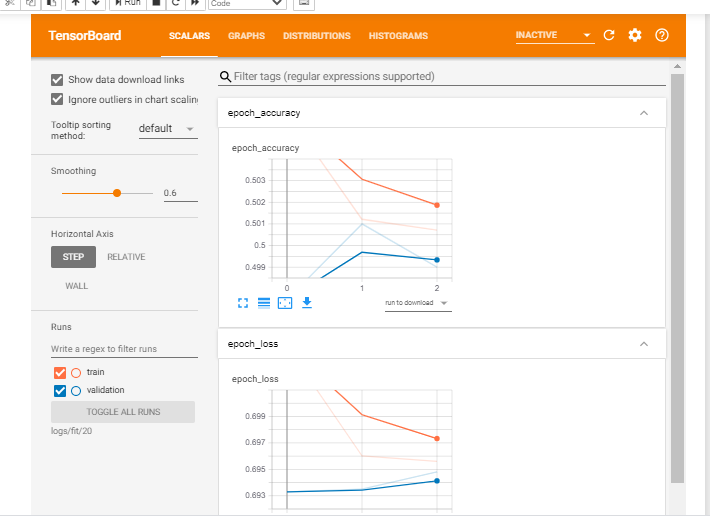

In [16]:
#Model 1 - results
from IPython.display import Image
Image(filename='Model_results_1.png') 

## Task 2- <b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>

In [20]:
#Removing existing logs
removing_logs()

Callback_metrics(X_train, y_train, X_test, y_test, activations = 'relu',Weight_init ='Random_uniform' , \
                     optimizser_use = 'sgd_mom',epoch_val = 7,batch_val = 16)

# Source path  
source = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit" + "\\"+ str(folder_name)
  
# Destination path  
destination = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit\20"

shutil.move(source,destination)

Welcome to Call Back Fumction in Deep learning
Activation - relu , Weight_initializser - Random_uniform,Optimizser - sgd_mom,Epoch - 7,Batch_size - 16
validation shape 6000
Train on 14000 samples, validate on 6000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/7
13792/14000 [============================>.] - ETA: 0s - loss: 0.7048 - accuracy: 0.4900 - F1_score 0.499
 - AUC  0.499

Epoch 00001: val_loss improved from inf to 0.69372, saving model to model_save/weights-01.hdf5
14000/14000 [==============================] - 8s 539us/sample - loss: 0.7046 - accuracy: 0.4906 - val_loss: 0.6937 - val_accuracy: 0.4990

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/7
13888/14000 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.5032 - F1_score 0.499
 - AUC  0.499

Epoch 00002: val_loss did not improve from 0.69372
14000/14000 [==============================] - 4s 304us/sample 

'C:\\Users\\User\\Desktop\\Applied_A\\Program\\DEEP_Learning\\Callback\\Callbacks\\logs\\fit\\20'

In [22]:
#%tensorboard --logdir logs/fit

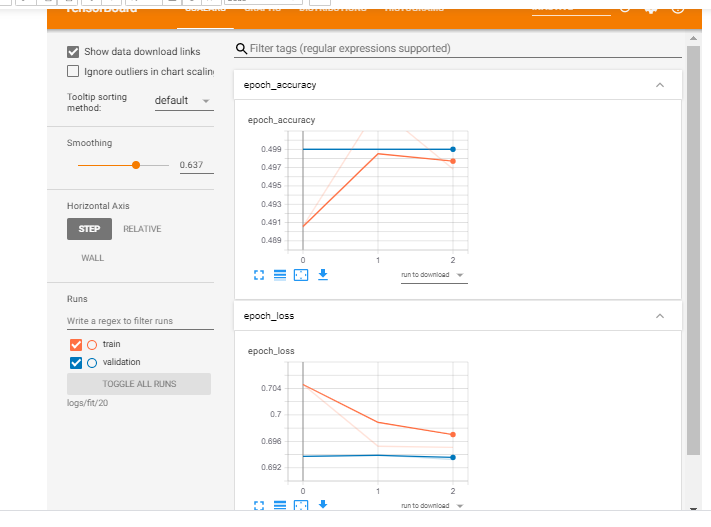

In [23]:
#Model 2 - results
from IPython.display import Image
Image(filename='Model_results_2.png') 

## Task 3- <b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>

In [25]:
#Removing existing logs
removing_logs()

Callback_metrics(X_train, y_train, X_test, y_test, activations = 'relu',Weight_init ='He_init' , \
                     optimizser_use = 'sgd_mom',epoch_val = 7,batch_val = 16)

# Source path  
source = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit" + "\\"+ str(folder_name)
  
# Destination path  
destination = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit\20"

shutil.move(source,destination)

Welcome to Call Back Fumction in Deep learning
Activation - relu , Weight_initializser - He_init,Optimizser - sgd_mom,Epoch - 7,Batch_size - 16
validation shape 6000
Train on 14000 samples, validate on 6000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/7
13968/14000 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.4961 - F1_score 0.4866666666666667
 - AUC  0.4866666666666667

Epoch 00001: val_loss improved from inf to 0.69326, saving model to model_save/weights-01.hdf5
14000/14000 [==============================] - 7s 499us/sample - loss: 0.7033 - accuracy: 0.4963 - val_loss: 0.6933 - val_accuracy: 0.4867

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/7
13984/14000 [============================>.] - ETA: 0s - loss: 0.6955 - accuracy: 0.5015 - F1_score 0.499
 - AUC  0.499

Epoch 00002: val_loss did not improve from 0.69326
14000/14000 [==============================]

'C:\\Users\\User\\Desktop\\Applied_A\\Program\\DEEP_Learning\\Callback\\Callbacks\\logs\\fit\\20'

In [28]:
#%tensorboard --logdir logs/fit/20/

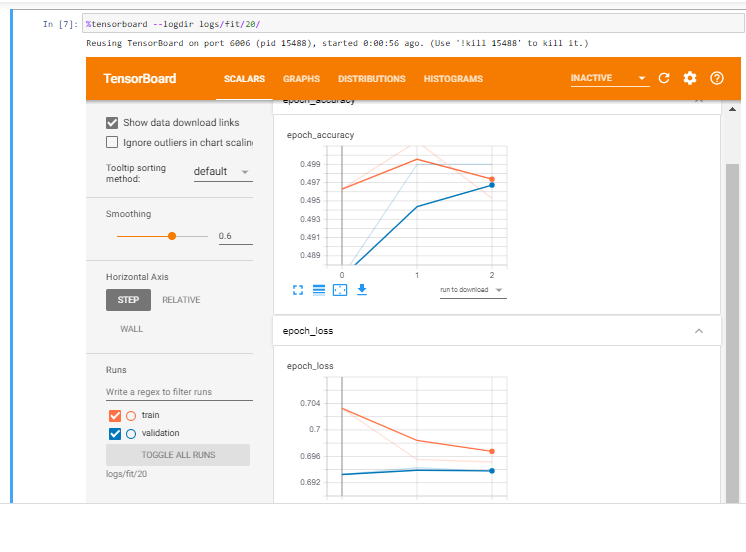

In [27]:
#Model 3 - results

Image(filename='Model_results_3.png') 

## Task 4- <b>Model-2</b>
<pre>
Try any value to get Better results
</pre>

In [51]:
#Removing existing logs
removing_logs()

Callback_metrics(X_train, y_train, X_test, y_test, activations = 'relu',Weight_init ='He_init' , \
                     optimizser_use = 'adam',epoch_val = 7,batch_val = 10)

# Source path  
source = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit" + "\\"+ str(folder_name)
  
# Destination path  
destination = r"C:\Users\User\Desktop\Applied_A\Program\DEEP_Learning\Callback\Callbacks\logs\fit\20"

shutil.move(source,destination)

Welcome to Call Back Fumction in Deep learning
Activation - relu , Weight_initializser - He_init,Optimizser - adam,Epoch - 7,Batch_size - 10
validation shape 6000
Train on 14000 samples, validate on 6000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 1/7
13940/14000 [============================>.] - ETA: 0s - loss: 0.6982 - accuracy: 0.4998 - F1_score 0.499
 - AUC  0.499
14000/14000 [==============================] - 13s 908us/sample - loss: 0.6982 - accuracy: 0.4999 - val_loss: 0.6944 - val_accuracy: 0.4990

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
Epoch 2/7
13990/14000 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.4989 - F1_score 0.501
 - AUC  0.501
14000/14000 [==============================] - 9s 608us/sample - loss: 0.6941 - accuracy: 0.4989 - val_loss: 0.6935 - val_accuracy: 0.5010

Epoch 00003: LearningRateScheduler reducing learning rate to 0.00999999977648258

'C:\\Users\\User\\Desktop\\Applied_A\\Program\\DEEP_Learning\\Callback\\Callbacks\\logs\\fit\\20'

In [47]:
%tensorboard --logdir logs/fit/20/

Reusing TensorBoard on port 6006 (pid 15056), started 0:01:33 ago. (Use '!kill 15056' to kill it.)

In [3]:
aa = [0.05710934, 0.13047184, 0.1339587 , 0.13197474, 0.11852044,
       0.07618686, 0.11367586, 0.08294692, 0.10321341, 0.05194194]

In [6]:
import numpy as np

In [9]:
an_array = np.array([[1, 1, 3], [1, 2, 1]])
max_index_col = np.argmax(an_array, axis=0)
print(max_index_col)
max_index_row = np.argmax(an_array, axis=1)
print(max_index_row)
type(max_index_row)

[0 1 0]
[2 1]


numpy.ndarray